In [52]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

In [238]:
nlp = pd.read_csv('NLP_feature.csv')
nlp.shape

(16539, 537)

In [53]:
# need to remove 8283, 8284 from dataset
data = pd.read_csv("dataset.csv")

In [55]:
data

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"DAY(0 MONDAY,6 SUNDAY)",...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,georgiou82,1134619,915,19097,102,#love is the air #andreasgeorgiou✔️,2,#love#andreasgeorgiou✔️,2017-02-07 18:07:37,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,georgiou82,1134619,915,17320,109,#work in #progress #andreasgeorgiou✔️,3,#work#progress#andreasgeorgiou✔️,2017-02-06 17:44:07,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,georgiou82,1134619,915,18826,68,Saturday #dayout!!! This is my #crazy #godson ...,4,#dayout#lovehim#crazy#godson,2017-02-04 16:51:59,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,georgiou82,1134619,915,18985,123,"What ever you decide to do, make sure it makes...",2,#andreasgeorgiou✔️#quoteoftheday,2017-02-03 22:15:12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,georgiou82,1134619,915,17203,65,Great meetings with great people! Welcome to o...,4,#actor#onset#newtvseries#tv,2017-02-01 23:34:21,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data.describe()

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,Unnamed: 36
count,3.000000e+04,30000.000000,30000.000000,30000.000000,1.0
mean,4.608031e+04,1531.426900,1861.486567,28.993933,1.0
std,8.745227e+04,2208.518135,4620.969015,365.380303,NaN
min,1.182000e+04,0.000000,0.000000,0.000000,1.0
25%,1.600600e+04,178.000000,301.000000,1.000000,1.0
50%,2.310000e+04,559.000000,742.000000,4.000000,1.0
75%,4.467800e+04,1565.000000,1816.000000,12.000000,1.0
max,1.134619e+06,7918.000000,158338.000000,26011.000000,1.0


In [14]:
full=pd.read_csv('dataset.csv', sep=',', na_values='NaN')
y=full["numberLikes"]

toDrop = ['username', 'urlProfile', 'urlImgProfile', 'filename', 'url', 'urlImage', 'isVideo']
processed = full.drop(toDrop,axis=1)

#nonCat = ['descriptionProfile', 'description', 'tags', 'mentions', 'localization']
#processed = processed.drop(nonCat, axis=1)

In [15]:
le = preprocessing.LabelEncoder()
le.fit(processed["alias"])
list(le.classes_)
alias_num=le.transform(processed["alias"])
#list(le.inverse_transform(alias_num))
processed["aliasNum"]=alias_num

In [16]:
avgLikes = []
numFollowers = []
selection = []

for i in range(0,np.max(processed["aliasNum"],axis=0)):
    numFollowers=np.append(numFollowers, processed[processed["aliasNum"]==i]['numberFollowers'].iloc[0])
    avgLikes=np.append(avgLikes, np.sum(processed[processed["aliasNum"]==i]["numberLikes"])/len(processed[processed["aliasNum"]==i]))
    if (avgLikes[i]<200000 and processed[processed["aliasNum"]==i]['numberFollowers'].iloc[0]<10000000):
        selection=np.append(selection, i)

In [17]:
filtered=processed[processed['aliasNum'].isin(selection)].reset_index(drop=True)

In [18]:
data = filtered

In [19]:
data.head()

,numberPosts,website,numberFollowing,descriptionProfile,alias,numberFollowers,date,mentions,multipleImage,localization,tags,numberLikes,description,aliasNum
0,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-29T05:00:00.000Z,"['@fraukeludowig_official', '@rtl_exclusiv', '...",False,NaN,['#exclusivspezial'],10047,With my lovely colleague @fraukeludowig_offici...,0
1,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-29T05:00:00.000Z,"['@tine', '@rachelzoe', '@lecolook', '@letsdan...",False,NaN,"['#jumpsuit', '#glam', '#ootn']",16781,"My look last night, hosting Let's Dance! Style...",0
2,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-27T05:00:00.000Z,"['@letsdance', '@rtlde', '@rtlde', '@letsdance']",False,NaN,"['#rehearsalday', '#behindthescenes']",11227,Calm before the 'glam' storm! 💋💄💅🏻💆🏼💇🏼Tomorrow...,0
3,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-24T05:00:00.000Z,"['@bydanienl', '@roland_mouret', '@casadeioffi...",False,NaN,"['#dress', '#shoes', '#glam']",21539,🌼Today's look for QVC.. styled by @bydanienl #...,0
4,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-22T05:00:00.000Z,"['@elisabettafranchi', '@serenagoldenbaum']",False,NaN,"['#weekend', '#yay', '#happyweekend', '#kiss']",21054,💋Happy Weekend Lovelies ❤ #weekend #yay #happy...,0


In [20]:
data['descriptionProfile'][4]

"TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise"

In [21]:
data['description'][4]

'💋Happy Weekend Lovelies ❤ #weekend #yay #happyweekend #kiss 💋'

In [22]:
emoji_regexp = u'[\U00002600-\U000026FF]|[\U00002700-\U000027BF]|[\U0001f300-\U0001f5fF]|[\U0001f600-\U0001f64F]|' \
               u'[\U0001f680-\U0001f6FF]|[\U00002A00-\U00002AFF]|[\U0001F1E0-\U0001F1FF]'
re.findall(emoji_regexp, data['descriptionProfile'][4], re.UNICODE)

[]

In [23]:
text = data['descriptionProfile'][1706]
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"
        u"\U00002A00-\U00002AFF"
        u"\U00002600-\U000026FF"
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

Dad, Husband, Photographer, Sony Artisan, contributor to NYT Mag, Time, and an occasionally funny person.
Dad, Husband, Photographer, Sony Artisan, contributor to NYT Mag, Time, and an occasionally funny person.


# Post Description

In [24]:
data['descriptionProfile'][6666]

'⚡️Founder & Creative Director @laagam______ •beatriz@okikotalents.com •inesarroyoruiz@gmail.com'

In [25]:
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      data['descriptionProfile'][6666]) 

In [26]:
letters_only

'  Founder   Creative Director  laagam        beatriz okikotalents com  inesarroyoruiz gmail com'

In [27]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words
words

['founder',
 'creative',
 'director',
 'laagam',
 'beatriz',
 'okikotalents',
 'com',
 'inesarroyoruiz',
 'gmail',
 'com']

In [28]:
from nltk.corpus import stopwords
words = [w for w in words if not w in stopwords.words("english")]
words

['founder',
 'creative',
 'director',
 'laagam',
 'beatriz',
 'okikotalents',
 'com',
 'inesarroyoruiz',
 'gmail',
 'com']

In [29]:
" ".join(words)

'founder creative director laagam beatriz okikotalents com inesarroyoruiz gmail com'

In [30]:
def cleanup(sentence):
    #letters_only = re.sub("[^a-zA-Z]", " ", sentence.split(', ')[0])
    #emojis = re.findall(emoji_regexp, sentence.split(', ')[0], re.UNICODE)
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", sentence)
        emojis = re.findall(emoji_regexp, sentence, re.UNICODE)
    except:
        letters_only = ''
        emojis = []
    words = letters_only.lower().split()        
    words = [w for w in words if not w in stopwords.words("english")]
    words = [w for w in words if len(w) > 1]
    return (" ".join(words)), (" ".join(emojis))

In [31]:
sentence, emojis = cleanup(data['description'][4])

In [32]:
sentence

'happy weekend lovelies weekend yay happyweekend kiss'

In [33]:
emojis

'💋 ❤ 💋'

In [34]:
data['description'].size

16148

In [35]:
clean = []
clean_emojis = []
for i in range( 0, data['description'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16148*100))+"% done")
    x,y = cleanup(data['description'][i])
    clean.append(x)
    clean_emojis.append(y)

6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
67% done
73% done
79% done
85% done
91% done
97% done


In [36]:
len(clean_emojis)

16148

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
 
clean_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 500) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
clean_features = clean_vectorizer.fit_transform(clean)

#tfidf_transformer = TfidfTransformer()
#clean_features = tfidf_transformer.fit_transform(clean_features)

# Numpy arrays are easy to work with, so convert the result to an 
# array
clean_features = clean_features.toarray()

In [38]:
clean_features.shape

(16148, 500)

In [39]:
vocab = clean_vectorizer.get_feature_names()
print(vocab)

['able', 'account', 'actually', 'ad', 'ada', 'add', 'adventure', 'ago', 'air', 'al', 'allah', 'almost', 'along', 'already', 'also', 'always', 'amazing', 'amg', 'another', 'anyone', 'anything', 'april', 'architecture', 'around', 'art', 'available', 'away', 'awesome', 'baby', 'back', 'barcelona', 'beach', 'beautiful', 'beautifuldestinations', 'beauty', 'become', 'behind', 'believe', 'berlin', 'best', 'better', 'big', 'bio', 'birthday', 'bit', 'black', 'blog', 'blue', 'body', 'book', 'breakfast', 'bring', 'california', 'came', 'camera', 'car', 'cars', 'cat', 'cave', 'ch', 'challenge', 'chance', 'change', 'check', 'chocolate', 'city', 'click', 'close', 'coachella', 'coast', 'code', 'coffee', 'collection', 'color', 'com', 'come', 'comes', 'coming', 'comment', 'community', 'como', 'con', 'conservation', 'cool', 'could', 'couple', 'course', 'cream', 'cute', 'da', 'dan', 'dari', 'day', 'days', 'de', 'deep', 'del', 'delicious', 'dengan', 'design', 'details', 'di', 'dia', 'different', 'done', 'd

In [51]:
new_vocab = []
for word in vocab:
    if len(word)>5:
        new_vocab.append(word)
print (' '.join(new_vocab))

account actually adventure almost already always amazing another anyone anything architecture around available awesome barcelona beautiful beautifuldestinations beauty become behind believe berlin better birthday breakfast california camera challenge chance change chocolate coachella coffee collection coming comment community conservation couple course delicious dengan design details different easter enough europe everyone everything excited experience explore family fashion favorite favourite featured feeling finally fitness follow followers forget france friday friend friends geographic getting gracias grateful guides hashtag healthy images important incredible inspiration inspired instagram island journey liketk liketkit liketoknow little living location london looking lovely madwhips magazine makeup making mercedes millionaire moment moments monday morning mother mountain mountains natgeo natgeocreative national natural nature nothing official online outfit people perfect performan

In [41]:
clean_features = pd.DataFrame(data=clean_features, columns=vocab)
clean_features.head()

,able,account,actually,ad,ada,add,adventure,ago,air,al,...,yang,year,years,yes,yesterday,yet,yo,yoga,young,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
clean_emojis_vectorizer = DictVectorizer()
#description_emojis_vectorizer = CountVectorizer() 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
#X = description_vectorizer.fit(emojis)
#clean_description_emojis_features = description_vectorizer.transform(clean_description_emojis)
X = clean_emojis_vectorizer.fit_transform(Counter(s.split()) for s in clean_emojis)

# Numpy arrays are easy to work with, so convert the result to an 
# array
clean_emojis_features = X.toarray()

In [43]:
clean_emojis_features.shape

(16148, 746)

In [45]:
#create list of unique emojis
emojis = set()
for i in range (16148):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            emojis.add(emoji)
emojis = list(emojis)
test = np.zeros(shape=(16148,750))

#create sentence to vector
for i in range (16148):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            test[i][emojis.index(emoji)]+=1

#verify results
#x = 0
#for i in range (20740):
    #for j in range(808):
        #if test[i][j] > 0:
            #x+=1
#x

In [46]:
test_emoji = np.zeros(shape=(1,746))
for i in range (16148):
    for j in range(746):
        if test[i][j] > 0:
            test_emoji[:,j]+=test[i][j]

In [47]:
count = 0
count_list = []
for i in range(746):
    if test_emoji[:,i]>175:
        count+=1
        count_list.append(i)
count_list

[2,
 3,
 35,
 60,
 81,
 105,
 114,
 128,
 163,
 170,
 176,
 207,
 246,
 253,
 270,
 295,
 305,
 306,
 327,
 356,
 363,
 383,
 385,
 412,
 453,
 491,
 496,
 507,
 573,
 577,
 604,
 616,
 646,
 651,
 689,
 696,
 732]

In [48]:
clean_features_emoji = pd.DataFrame(data=test[:,count_list])
clean_features_emoji.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.00000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,0.011766,0.074065,0.032388,0.014924,0.078895,0.013562,0.090847,0.013252,0.062237,0.014367,...,0.029477,0.027186,0.02539,0.019383,0.012076,0.011147,0.052886,0.021303,0.019569,0.015358
std,0.117720,0.520790,0.247119,0.125767,0.367730,0.401585,0.397064,0.156042,0.351452,0.192229,...,0.170240,0.166395,0.17126,0.174722,0.136906,0.159347,0.307906,0.157131,0.190798,0.136349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,16.000000,2.000000,3.000000,8.000000,18.000000,11.000000,9.000000,8.000000,10.000000,...,3.000000,5.000000,3.00000,8.000000,6.000000,12.000000,8.000000,3.000000,13.000000,5.000000


In [49]:
emoji_set = set()
for i in range (16148):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            if emojis.index(emoji) in count_list:
                emoji_set.add(emoji)
print (' '.join(emoji_set))

🙈 😎 ✨ 🚨 🏽 ➖ 🌴 💋 ☀ 👌 💙 😍 ✌ ❤ 🏻 🖤 😜 😉 🎉 🔥 📷 💪 💛 🌸 👇 💗 😘 🙌 😂 💕 😋 🏼 💰 😊 👉 📸 🙏


# User Description

In [78]:
clean_user = []
clean_user_emojis = []
for i in range( 0, data['descriptionProfile'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16539*100))+"% done")
    x,y = cleanup(data['descriptionProfile'][i])
    clean_user.append(x)
    clean_user_emojis.append(y)

6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
67% done
73% done
79% done
85% done
91% done
97% done


In [79]:
clean_user_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_user_features = clean_user_vectorizer.fit_transform(clean_user)
clean_user_features = clean_user_features.toarray()
clean_user_features.shape

(16539, 250)

In [80]:
vocab = clean_user_vectorizer.get_feature_names()
print(vocab)

['account', 'actor', 'actress', 'adventure', 'adventures', 'advertising', 'ambassador', 'amsterdam', 'angeles', 'anthony', 'app', 'art', 'artist', 'athlete', 'au', 'australia', 'author', 'available', 'bali', 'based', 'beautiful', 'beauty', 'best', 'blog', 'blogger', 'book', 'booking', 'bookings', 'br', 'brand', 'brasil', 'business', 'california', 'camera', 'cat', 'ceo', 'cep', 'channel', 'check', 'city', 'click', 'co', 'coach', 'collaborations', 'com', 'community', 'consultant', 'contact', 'contato', 'content', 'contributor', 'cookbook', 'creative', 'creator', 'credit', 'currently', 'daily', 'day', 'de', 'design', 'designer', 'digital', 'director', 'download', 'dream', 'dreams', 'dubai', 'earth', 'el', 'em', 'email', 'enquiries', 'entrepreneur', 'explorer', 'facebook', 'family', 'fashion', 'fb', 'feature', 'featured', 'feed', 'filmmaker', 'fitness', 'follow', 'food', 'founder', 'free', 'french', 'fun', 'geographic', 'germany', 'get', 'girl', 'gmail', 'go', 'good', 'great', 'hair', 'hea

In [81]:
clean_user_features = pd.DataFrame(data=clean_user_features, columns=vocab)
clean_user_features.head()

,account,actor,actress,adventure,adventures,advertising,ambassador,amsterdam,angeles,anthony,...,working,world,worldwide,writer,www,yahoo,yoga,york,youtube,youtuber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
clean_user_emojis_vectorizer = DictVectorizer()
X = clean_user_emojis_vectorizer.fit_transform(Counter(s.split()) for s in clean_user_emojis)
clean_user_emojis_features = X.toarray()
clean_user_emojis_features.shape

(16539, 382)

# Hashtags

In [83]:
#data['tags'][0][1:-1].split(', ')[23][2:-1]
data['tags'][0]

"['#exclusivspezial']"

In [84]:
sentence, emojis = cleanup(data['tags'][0])

In [85]:
sentence

'exclusivspezial'

In [86]:
emojis

''

In [87]:
clean_tag = []
clean_tag_emojis = []
for i in range( 0, data['tags'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16539*100))+"% done")
    x,y = cleanup(data['tags'][i])
    if len(y) > 0:
        print('yes')
    clean_tag.append(x)
    clean_tag_emojis.append(y)

6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
67% done
73% done
79% done
85% done
91% done
97% done


In [88]:
clean_tag[0:10]

['exclusivspezial',
 'jumpsuit glam ootn',
 'rehearsalday behindthescenes',
 'dress shoes glam',
 'weekend yay happyweekend kiss',
 'dress hair makeup glam letsdance liveshow funtimes ootn',
 'danielhartwich showtime',
 '',
 'wewokeuplikethis teammeis letsdance breakfast cologne girls wirsinddiebademeister',
 'happygirl']

In [171]:
clean_tag_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_tag_features = clean_tag_vectorizer.fit_transform(clean_tag)
clean_tag_features = clean_tag_features.toarray()
clean_tag_features.shape

(16539, 250)

In [172]:
vocab = clean_tag_vectorizer.get_feature_names()
print(vocab)

['ad', 'adventure', 'africa', 'agameoftones', 'alldaytravel', 'amazing', 'amg', 'amsterdam', 'aov', 'archilovers', 'architecture', 'art', 'artofvisuals', 'astonmartin', 'audi', 'australia', 'auto', 'awesome', 'bali', 'barcelona', 'beautiful', 'beautifulcuisines', 'beautifuldestinations', 'beauty', 'berlin', 'bestvacations', 'bestwoof', 'bladelife', 'bmw', 'bmx', 'bnw', 'brasil', 'brazilianbondbuilder', 'breakfast', 'bride', 'california', 'canada', 'canon', 'cat', 'cave', 'cbviews', 'china', 'chocolate', 'classic', 'climatechange', 'coachella', 'conservation', 'cookbook', 'createcommune', 'delicious', 'design', 'dessert', 'diewocheaufinstagram', 'discoverearth', 'dish', 'drivetastefully', 'earth', 'earthday', 'earthfocus', 'earthpix', 'easter', 'europa', 'europe', 'eurotrip', 'exploretocreate', 'fantastic', 'fashion', 'ferrari', 'fitness', 'focus', 'follow', 'followme', 'followmeto', 'food', 'foodblogger', 'foodie', 'foodphotography', 'forum', 'france', 'fujifilm', 'gallery', 'germany',

In [173]:
clean_tag_features = pd.DataFrame(data=clean_tag_features, columns=vocab)
clean_tag_features.head()

,ad,adventure,africa,agameoftones,alldaytravel,amazing,amg,amsterdam,aov,archilovers,...,wildlife,wolfmillionaire,wonderful,workout,world,worldplaces,wu,xt,yoga,yourshotphotographer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Mentions

In [92]:
data['mentions'][0]

"['@fraukeludowig_official', '@rtl_exclusiv', '@tine', '@lecolook', '@lecolook', '@tine.siepmann', '@fraukeludowig_official']"

In [93]:
sentence, emojis = cleanup(data['mentions'][0])

In [94]:
sentence

'fraukeludowig official rtl exclusiv tine lecolook lecolook tine siepmann fraukeludowig official'

In [95]:
emojis

''

In [96]:
clean_mentions = []
clean_mentions_emojis = []
for i in range( 0, data['mentions'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16539*100))+"% done")
    x,y = cleanup(data['mentions'][i])
    if len(y) > 0:
        print('yes')
    clean_mentions.append(x)
    clean_mentions_emojis.append(y)

6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
67% done
73% done
79% done
85% done
91% done
97% done


In [97]:
clean_mentions[0:10]

['fraukeludowig official rtl exclusiv tine lecolook lecolook tine siepmann fraukeludowig official',
 'tine rachelzoe lecolook letsdance rtlde rachelzoe lecolook tine siepmann',
 'letsdance rtlde rtlde letsdance',
 'bydanienl roland mouret casadeiofficial xellycvk philipsbenelux philipssonicare qvcdeutschland xellycvk philipsbenelux bydanienl philipssonicare qvcdeutschland meis enterprise',
 'elisabettafranchi serenagoldenbaum',
 'elisabettafranchi serenagoldenbaum letsdance rtlde rtl exclusiv elisabettafranchi serenagoldenbaum rtlde letsdance',
 'letsdance rtlde fraukeludowig official',
 'serenagoldenbaum letsdance rtlde serenagoldenbaum',
 'meis enterprise letsdance pollysblackdress misssmeis meis enterprise',
 '']

In [251]:
clean_mentions_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_mentions_features = clean_mentions_vectorizer.fit_transform(clean_mentions)
clean_mentions_features = clean_mentions_features.toarray()
clean_mentions_features.shape

(16539, 100)

In [252]:
vocab = clean_mentions_vectorizer.get_feature_names()
print(vocab)

['americanstyle', 'anastasiabeverlyhills', 'app', 'art', 'arts', 'asos', 'au', 'australia', 'beautifulcuisines', 'beautifuldestinations', 'benefitcosmetics', 'bestmeow', 'buzzfeedfood', 'cars', 'chanelofficial', 'chique', 'chloe', 'co', 'coachella', 'de', 'dotzsoh', 'earth', 'europe', 'fashion', 'fashiongoalsz', 'fashionzine', 'fitness', 'food', 'foodandwine', 'frique', 'gucci', 'guy', 'guytang', 'hairsandstyles', 'hm', 'hudabeauty', 'hypebeast', 'indian', 'infatuation', 'inflowtravel', 'instagram', 'kissinfashion', 'la', 'le', 'levis', 'liketoknow', 'luxury', 'maccosmetics', 'mensfashions', 'menwithclass', 'menwithcuisines', 'menwithexplore', 'menwithfootwear', 'menwithhealth', 'menwithmotors', 'menwithsounds', 'menwithstreetstyle', 'menwithurban', 'mercedesamg', 'mercedesbenz', 'mi', 'mike', 'milano', 'millionaire', 'musikafrere', 'mydentity', 'natgeo', 'natgeocreative', 'natgeotravel', 'nyxcosmetics', 'official', 'ootdmagazine', 'ootdsubmit', 'paris', 'paul', 'photography', 'plushla

In [253]:
clean_mentions_features = pd.DataFrame(data=clean_mentions_features, columns=vocab)
clean_mentions_features.head()

,americanstyle,anastasiabeverlyhills,app,art,arts,asos,au,australia,beautifulcuisines,beautifuldestinations,...,travelandleisure,usa,vacations,weaponswow,windsorstore,wolf,wonderful,world,ysl,zara
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Localization

In [101]:
data['localization'][23]

nan

In [102]:
sentence, emojis = cleanup(data['localization'][23])

In [103]:
sentence

''

In [104]:
emojis

''

In [105]:
clean_places = []
clean_places_emojis = []
for i in range( 0, data['localization'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16539*100))+"% done")
    x,y = cleanup(data['localization'][i])
    if len(y) > 0:
        print('yes')
    clean_places.append(x)
    clean_places_emojis.append(y)

6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
67% done
73% done
79% done
85% done
91% done
97% done


In [106]:
clean_places_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_places_features = clean_places_vectorizer.fit_transform(clean_places)
clean_places_features = clean_places_features.toarray()
clean_places_features.shape

(16539, 250)

In [107]:
vocab = clean_places_vectorizer.get_feature_names()
print(vocab)

['abu', 'affalterbach', 'airport', 'alberta', 'american', 'amg', 'amsterdam', 'angeles', 'antarctica', 'arab', 'argentina', 'arizona', 'art', 'arts', 'atlanta', 'australia', 'austria', 'bali', 'banff', 'bar', 'barcelona', 'baselworld', 'bay', 'beach', 'beirut', 'bel', 'belgium', 'berlin', 'beverly', 'big', 'bio', 'black', 'blue', 'bora', 'bordeaux', 'brazil', 'bridge', 'british', 'brooklyn', 'cafe', 'california', 'canyon', 'cape', 'carlton', 'carolina', 'center', 'central', 'centre', 'china', 'city', 'club', 'coachella', 'coast', 'coffee', 'colombia', 'columbia', 'constance', 'copenhagen', 'costa', 'cuba', 'dallas', 'de', 'del', 'denmark', 'desert', 'dhabi', 'di', 'disney', 'district', 'dolomiti', 'downtown', 'du', 'dubai', 'east', 'el', 'eleuthera', 'emirates', 'empire', 'falls', 'faroe', 'festival', 'finland', 'fitness', 'florida', 'forn', 'four', 'france', 'francesc', 'francisco', 'frankfurt', 'garden', 'georgia', 'germany', 'gold', 'grand', 'greece', 'halaveli', 'hamburg', 'hawaii'

In [108]:
clean_places_features = pd.DataFrame(data=clean_places_features, columns=vocab)
clean_places_features.head()

,abu,affalterbach,airport,alberta,american,amg,amsterdam,angeles,antarctica,arab,...,wales,walt,washington,watch,west,western,williamsburg,world,york,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Username

In [109]:
sentence, emojis = cleanup(data['alias'][0])
sentence

'misssmeis'

In [110]:
clean_name = []
clean_name_emojis = []
for i in range( 0, data['alias'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16539*100))+"% done")
    x,y = cleanup(data['alias'][i])
    if len(y) > 0:
        print('yes')
    clean_name.append(x)
    clean_name_emojis.append(y)

6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
67% done
73% done
79% done
85% done
91% done
97% done


In [111]:
clean_name_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = None) 
clean_name_features = clean_name_vectorizer.fit_transform(clean_name)
clean_name_features = clean_name_features.toarray()
clean_name_features.shape

(16539, 1101)

In [112]:
vocab = clean_name_vectorizer.get_feature_names()
print(vocab)

['aaronsanimals', 'abanddoned', 'achievetheimpossible', 'adenorah', 'adesignersmind', 'adingattamimi', 'adriancmurray', 'afnan', 'afofa', 'aguynamedpatrick', 'ahmet', 'aialahernando', 'aka', 'akusepp', 'ala', 'albatel', 'aleksmusika', 'alenaakhmadullina', 'alessandro', 'alessioalbi', 'alexandrabring', 'alexandreagarza', 'alexcentomo', 'alexhonnold', 'alexiarayee', 'alexisren', 'alexmidler', 'alexstrohl', 'alice', 'aliona', 'alissaviolet', 'alldaytravel', 'alliemtaylor', 'alva', 'amandabisk', 'amandacerny', 'amiraa', 'amivitale', 'ammish', 'amymarie', 'amytoensing', 'ana', 'anadeliafitness', 'anddicted', 'andicsinger', 'andreabadendyck', 'andreadenver', 'andreamelchiorre', 'andreleonardooficial', 'andy', 'andyheart', 'angela', 'angelicablick', 'anilarjandas', 'anker', 'anllela', 'annanystrom', 'anniethorisdottir', 'annijor', 'anniksas', 'annlestyle', 'annybakhireva', 'antonlofer', 'applebums', 'aq', 'arc', 'arch', 'archilovers', 'archixxi', 'argonautphoto', 'arias', 'arielealasko', 'ari

In [113]:
clean_name_features = pd.DataFrame(data=clean_name_features, columns=vocab)
clean_name_features.head()

,aaronsanimals,abanddoned,achievetheimpossible,adenorah,adesignersmind,adingattamimi,adriancmurray,afnan,afofa,aguynamedpatrick,...,zachallia,zacsmithfitness,zaraamaria,zhang,zhanna,zito,zoelaz,zoepastelle,zynp,zyoshka
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# XGBoost 

In [230]:
#dataset1 = np.hstack((clean_places_features,clean_mentions_features,clean_tag_features,clean_user_features,clean_features, clean_name_features))
dataset1 = np.hstack((clean_features, clean_features_emoji))
#dataset1 = np.hstack((clean_name_features))
#dataset2 = np.hstack((data.aliasNum.as_matrix().reshape(16539,1), data.numberFollowers.as_matrix().reshape(16539,1), data.numberFollowing.as_matrix().reshape(16539,1), data.numberPosts.as_matrix().reshape(16539,1)))
dataset2 = np.hstack((data.numberFollowers.as_matrix().reshape(16539,1), data.numberFollowing.as_matrix().reshape(16539,1), data.numberPosts.as_matrix().reshape(16539,1)))

In [231]:
dataset1.shape

(16539, 537)

In [234]:
dataset = np.hstack((dataset1,dataset2))
#dataset = np.hstack((clean_features,dataset2))

In [235]:
dataset.shape

(16539, 540)

In [236]:
pd.concat([clean_features, clean_features_emoji], axis=1).to_csv('NLP_feature.csv')

In [68]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {
         }
xg = GridSearchCV(xgb.XGBRegressor(), parameters, cv = 5, scoring = 'neg_mean_squared_error', verbose=100)

In [67]:
xg.fit(dataset, np.ravel(data.numberLikes))
xg.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ....................... , score=-2623637759.073474, total=  12.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s
[CV]  ................................................................
[CV] ....................... , score=-2566226130.289593, total=  12.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.2s remaining:    0.0s
[CV]  ................................................................
[CV] ....................... , score=-1564805525.883426, total=  12.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.8s remaining:    0.0s
[CV]  ................................................................
[CV] ........................ , score=-880064722.097548, total=  12.2s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   51.4s remaining:    0.0s
[CV]  ...............................................

-1777917440.211694

In [189]:
from sklearn.model_selection import cross_val_score
model = xgb.XGBRegressor()
scores = cross_val_score(model, dataset, np.ravel(data.numberLikes), cv=5, scoring = 'neg_mean_squared_error')
np.mean(scores)

-9971761377.423933

In [69]:
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [160]:
x_train, x_test, y_train, y_test = train_test_split(dataset, np.ravel(data.numberLikes), test_size=0.2, random_state=42)

In [103]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [104]:
model.score(x_test,y_test)

0.75771877222625805

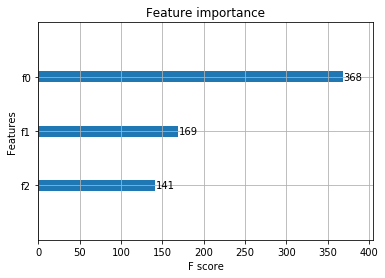

In [89]:
xgb.plot_importance(model)

In [90]:
vec = model.feature_importances_
for i in range(len(vec)):
    if vec[i] > .05:
        print(i)

0
1
2


In [91]:
testing = model.predict(x_test)

In [92]:
testing[90]

11495.919

In [93]:
y_test[90]

13763

In [161]:
from sklearn.metrics import mean_squared_error
model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.48, n_estimators=361)
#model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.005, n_estimators=1000)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

18866.8346957


In [157]:
model_xgb.score(x_test,y_test)

0.89940518793096258

500 post + emoji > 175: 18692.8856189

500 post + emoji > 200: 18734.5154991

No NLP: 19476.5992654

500 Hashtags + 250 post: 19879.1448955 

500 Hashtags + 500 post: 19433.0344208

250 Hashtags + 500 post: 19042.5345761

500 post: 18866.8346957

750 post: 19520.5488678

500 post + 250 mentions: 19062.2032591

500 post + 500 mentions: 19531.3469119

500 post + 100 mentions: 19205.8928324

In [151]:
data.describe()

,numberPosts,numberFollowing,numberFollowers,numberLikes,aliasNum
count,16148.000000,1.614800e+04,1.614800e+04,16148.000000,16148.000000
mean,2318.168380,2.646363e+03,7.964901e+05,17190.427793,484.723062
std,2656.961815,5.980071e+04,1.182281e+06,29268.592545,280.079340
min,15.000000,0.000000e+00,1.249650e+05,0.000000,0.000000
25%,800.000000,1.920000e+02,1.964890e+05,3171.000000,242.000000
50%,1495.000000,3.970000e+02,3.756710e+05,7120.500000,484.000000
75%,2932.000000,6.510000e+02,8.823920e+05,16994.750000,727.000000
max,27671.000000,1.838511e+06,9.296371e+06,364016.000000,971.000000


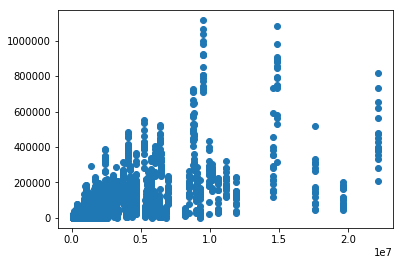

In [153]:
import matplotlib.pyplot as plt
plt.scatter(data['numberFollowers'],data['numberLikes'])
plt.show()

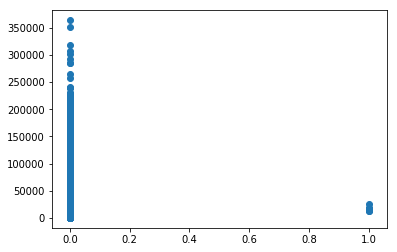

In [108]:
plt.scatter(x_train[:, [1351]], y_train)
plt.show()

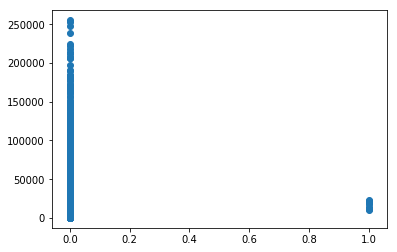

In [109]:
plt.scatter(x_test[:, [1351]], y_test)
plt.show()

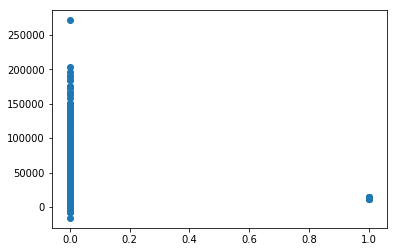

In [110]:
plt.scatter(x_test[:, [1351]], y_pred)
plt.show()

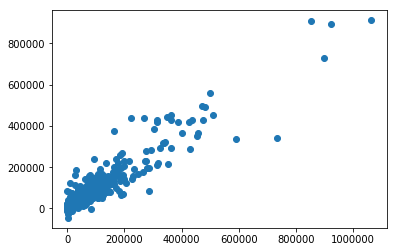

In [162]:
plt.scatter(y_test, y_pred)
plt.show()

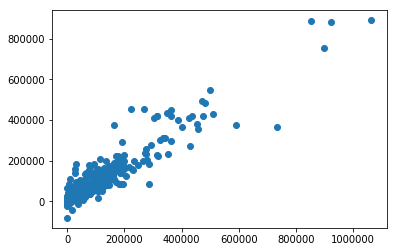

In [154]:
plt.scatter(y_test, y_pred)
plt.show()

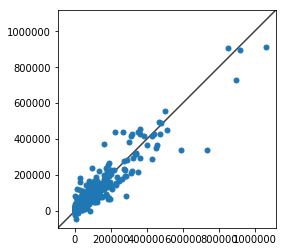

In [163]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

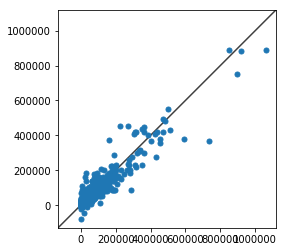

In [155]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [96]:
filename = np.ravel(data['filename'])
username = np.ravel(data['alias'])
id_name = np.arange(16539)

In [105]:
filename[425].split(', ')[0][2:-2]

'18095789_1373340369418393_6013489667972792320_n.jpg'

In [106]:
for i in range(16539):
    if len(filename[i].split(', '))> 1:
        filename[i] = filename[i].split(', ')[0][2:-1]
    if i == 425:
        filename[i] = filename[i][:-1]

In [107]:
target = open("names.txt", 'w')
for i in range(16359):
    target.write(str(id_name[i]) + '\t' + '/home/ubuntu/new_img/'+ username[i]+'/'+filename[i] + '\n')
target.close()

In [108]:
for i in range(len(set(data['alias'])

{'1misssmeis',
 '3ala2o',
 '433',
 '6senseofficial',
 '7ikhals',
 '_foodstories_',
 '_hollyt',
 '_ingo_1',
 '_mariannejacobsen_',
 '_picolo',
 '_tinamaria',
 '_tuck4',
 'a.sharif92',
 'aaronsanimals',
 'abanddoned',
 'achievetheimpossible',
 'adenorah',
 'adesignersmind',
 'adingattamimi_photography',
 'adriancmurray',
 'afnan_albatel',
 'afofa',
 'aguynamedpatrick',
 'ahmet.erdem',
 'aialahernando',
 'aka.the.one',
 'akusepp',
 'aleksmusika',
 'alenaakhmadullina',
 'alessandro_carpentiero',
 'alessioalbi',
 'alexandrabring',
 'alexandreagarza',
 'alexcentomo',
 'alexhonnold',
 'alexiarayee',
 'alexisren',
 'alexmidler',
 'alexstrohl',
 'alice_gao',
 'aliona_hilt',
 'alissaviolet',
 'alldaytravel',
 'alliemtaylor',
 'amandabisk',
 'amandacerny',
 'amiraa88',
 'amivitale',
 'ammish',
 'amymarie',
 'amytoensing',
 'ana_lombardini',
 'anadeliafitness',
 'anddicted',
 'andicsinger',
 'andreabadendyck',
 'andreadenver3',
 'andreamelchiorre1',
 'andreleonardooficial',
 'andy_mann',
 'andyhea

In [109]:
data['alias']

NameError: name 'knifeaxe' is not defined